<a href="https://colab.research.google.com/github/Aloma597/Python_project/blob/main/projectreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
import yellowbrick as yb
from yellowbrick.features.rankd import Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates


In [ ]:
# importing files from goggle drive
filepath = '/content/drive/MyDrive/NKI_cleaned.csv'
df_breast_cancer = pd.read_csv(filepath)
df_breast_cancer

Patient   ID  age  eventdeath   survival  timerecurrence  chemo  hormonal  \
0      s122   18   43           0  14.817248       14.817248      0         0   
1      s123   19   48           0  14.261465       14.261465      0         0   
2      s124   20   38           0   6.644764        6.644764      0         0   
3      s125   21   50           0   7.748118        7.748118      0         1   
4      s126   22   38           0   6.436687        6.318960      0         0   
..      ...  ...  ...         ...        ...             ...    ...       ...   
267     s71  308   48           1   2.608300        1.982204      1         0   
268     s72  309   39           1   5.504100        3.028063      0         0   
269     s73  310   50           1   2.619200        2.149213      0         0   
270     s75  311   52           1   2.290500        2.209446      0         1   
271     s76  312   52           1   3.737000        2.127310      0         0   

     amputation  histtype  ...  Contig36312_RC  Contig38980_RC  NM_000853  \
0             1         1  ...        0.591103       -0.355018   0.373644   
1             0         1  ...       -0.199829       -0.001635  -0.062922   
2             0         1  ...        0.328736       -0.047571   0.084228   
3             0         1  ...        0.648861       -0.039088   0.182182   
4             1         1  ...       -0.287538       -0.286893   0.057082   
..          ...       ...  ...             ...             ...        ...   
267           1         1  ...       -0.695745       -0.076025   0.201054   
268           1         1  ...       -0.743322        0.108220   0.083472   
269           1         1  ...       -0.778710        0.251779  -0.063160   
270           1         1  ...       -0.614775       -0.417394  -0.077948   
271           1         1  ...       -0.234388        0.181319  -0.030782   

     NM_000854  NM_000860  Contig29014_RC  Contig46616_RC  NM_000888  \
0    -0.760690  -0.164025       -0.038726        0.237856  -0.087631   
1    -0.682204  -0.220934       -0.100088       -0.466537  -0.231547   
2    -0.695950  -0.402840       -0.099965        0.110155  -0.114298   
3    -0.524640   0.037320       -0.167688       -0.016790  -0.285344   
4    -0.565021  -0.105632       -0.108148       -0.405853  -0.053601   
..         ...        ...             ...             ...        ...   
267  -0.108361   0.222534       -0.471391        0.026301   0.476758   
268  -0.859677  -0.551512       -0.191424       -0.844488  -0.357929   
269   0.450576   0.452686        1.055764        0.591880  -0.510884   
270  -0.126006  -0.841332       -0.274742       -0.063019  -0.396531   
271  -1.035581  -0.521642       -0.301661       -0.060805   0.794952   

     NM_000898  AF067420  
0    -0.369153  0.153795  
1    -0.643019 -0.014098  
2     0.258495 -0.198911  
3    -0.251188  0.862710  
4    -0.677072  0.134160  
..         ...       ...  
267  -0.468408 -0.843889  
268  -0.585760  0.169989  
269   0.251903 -0.822792  
270   0.356816  0.345088  
271  -1.089303 -0.326193  

[272 rows x 1570 columns]

In [ ]:
# EDA
# subset data (without uninterpretable features)
features_to_drop = df_breast_cancer.columns[16:]
data_subset = df_breast_cancer.drop(features_to_drop, axis=1)



In [ ]:
# data splitting
X = data_subset.drop(['Patient', 'ID', 'eventdeath'], axis=1)
y = data_subset['eventdeath']

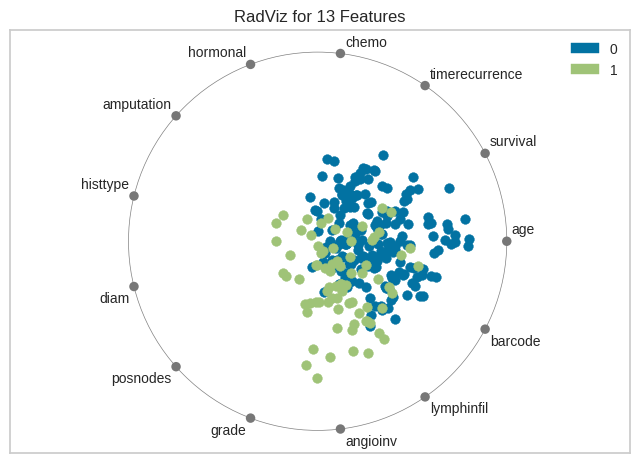

<Axes: title={'center': 'RadViz for 13 Features'}>

In [ ]:
#visualise class separation
classes = ['alive', 'dead']
features = X.columns
visualizer = RadViz(clases=classes, features=features)

X_matrix = X.values
y_matrix = y.values

visualizer.fit(X_matrix, y_matrix)
visualizer.transform(X_matrix)
visualizer.poof()

In [ ]:
# observing correlation between features
df_breast_cancer = df_breast_cancer.drop('Patient', axis = 1)
df_breast_correl = df_breast_cancer.corr()
df_breast_correl

ID       age  eventdeath  survival  timerecurrence  \
ID              1.000000  0.241627   -0.006341 -0.187579       -0.188017   
age             0.241627  1.000000   -0.147643  0.076966        0.128399   
eventdeath     -0.006341 -0.147643    1.000000 -0.540482       -0.608654   
survival       -0.187579  0.076966   -0.540482  1.000000        0.921993   
timerecurrence -0.188017  0.128399   -0.608654  0.921993        1.000000   
...                  ...       ...         ...       ...             ...   
Contig29014_RC -0.130759 -0.032116   -0.013627  0.035966        0.031895   
Contig46616_RC  0.058606  0.072555   -0.101535  0.076713        0.113858   
NM_000888      -0.002266 -0.072053    0.060617 -0.000590        0.006724   
NM_000898       0.015197  0.029027   -0.074005  0.077942        0.080538   
AF067420       -0.116732 -0.158824   -0.042147  0.196706        0.179075   

                   chemo  hormonal  amputation  histtype      diam  ...  \
ID             -0.171950  0.075222   -0.090421  0.071923 -0.118404  ...   
age            -0.056729  0.237249   -0.000998 -0.003012 -0.027922  ...   
eventdeath     -0.071676 -0.100933    0.066227 -0.007382  0.215344  ...   
survival       -0.003123 -0.125775   -0.027922 -0.079111 -0.032459  ...   
timerecurrence  0.028278 -0.068263   -0.027106 -0.062272 -0.061141  ...   
...                  ...       ...         ...       ...       ...  ...   
Contig29014_RC  0.145939 -0.014859    0.070605 -0.095707  0.015409  ...   
Contig46616_RC  0.005792 -0.018369   -0.042298  0.121793 -0.010099  ...   
NM_000888       0.083653 -0.006355   -0.064839 -0.029400  0.065680  ...   
NM_000898      -0.010426 -0.057744    0.032775 -0.037872  0.056336  ...   
AF067420       -0.024545 -0.042922    0.003309  0.034179 -0.120425  ...   

                Contig36312_RC  Contig38980_RC  NM_000853  NM_000854  \
ID                   -0.052699        0.094073   0.143391  -0.029730   
age                   0.048041        0.028777  -0.008404   0.052601   
eventdeath           -0.123744       -0.117945  -0.153370   0.065702   
survival              0.131852       -0.006661   0.124940  -0.053147   
timerecurrence        0.115124        0.011598   0.153211  -0.095184   
...                        ...             ...        ...        ...   
Contig29014_RC       -0.090424        0.058788   0.068970   0.011963   
Contig46616_RC        0.335879        0.083468   0.196913   0.080691   
NM_000888            -0.087315        0.084393  -0.011089  -0.006200   
NM_000898             0.192476        0.054780   0.114794   0.089951   
AF067420              0.023572        0.129791   0.054366  -0.048513   

                NM_000860  Contig29014_RC  Contig46616_RC  NM_000888  \
ID              -0.079939       -0.130759        0.058606  -0.002266   
age              0.056165       -0.032116        0.072555  -0.072053   
eventdeath      -0.146709       -0.013627       -0.101535   0.060617   
survival         0.065765        0.035966        0.076713  -0.000590   
timerecurrence   0.054589        0.031895        0.113858   0.006724   
...                   ...             ...             ...        ...   
Contig29014_RC   0.095058        1.000000       -0.080322  -0.024961   
Contig46616_RC   0.077566       -0.080322        1.000000  -0.109103   
NM_000888       -0.088414       -0.024961       -0.109103   1.000000   
NM_000898        0.105724       -0.037061        0.182026  -0.011005   
AF067420        -0.084420       -0.125295        0.023423   0.116222   

                NM_000898  AF067420  
ID               0.015197 -0.116732  
age              0.029027 -0.158824  
eventdeath      -0.074005 -0.042147  
survival         0.077942  0.196706  
timerecurrence   0.080538  0.179075  
...                   ...       ...  
Contig29014_RC  -0.037061 -0.125295  
Contig46616_RC   0.182026  0.023423  
NM_000888       -0.011005  0.116222  
NM_000898        1.000000  0.089427  
AF067420         0.089427  1.000000  

[1569 rows x 1569 col

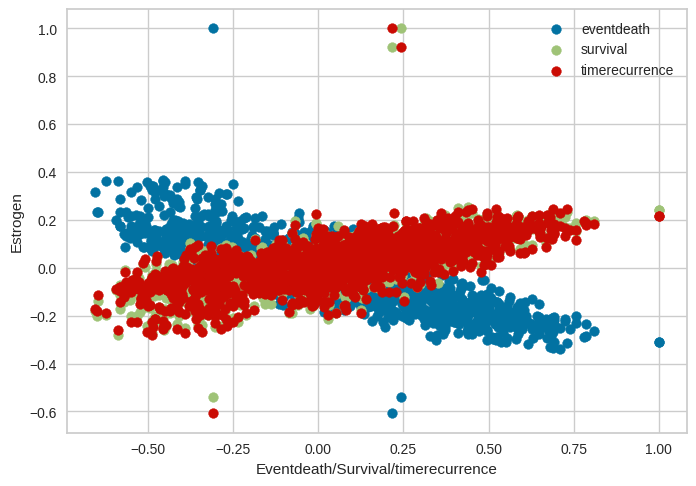

In [ ]:
# plot a scattered plot to visualize the data
import matplotlib.pyplot as plt
plt.scatter(df_breast_correl['esr1'], df_breast_correl['eventdeath'], label = 'eventdeath')

plt.scatter(df_breast_correl['esr1'], df_breast_correl['survival'], label = 'survival')


plt.scatter(df_breast_correl['esr1'], df_breast_correl['timerecurrence'], label = 'timerecurrence')
plt.ylabel('Estrogen')
plt.xlabel('Eventdeath/Survival/timerecurrence')
plt.legend()
plt.savefig('overview.png')

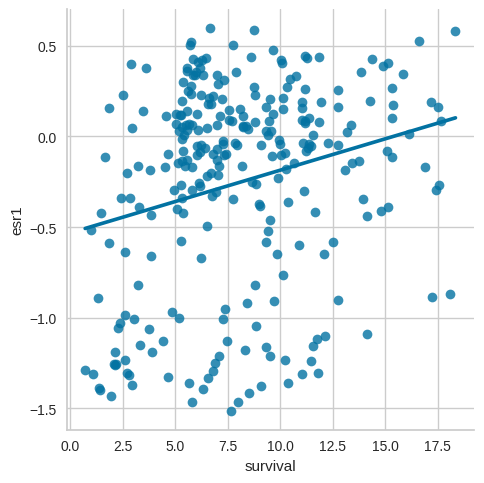

In [ ]:
sns.lmplot(x = 'survival', y = 'esr1', data = df_breast_cancer, ci = None)
plt.show()

In [ ]:
# setting up the dataframe for death
df_death = df_breast_cancer[['age', 'chemo','hormonal','amputation','histtype','diam','posnodes','grade','angioinv','lymphinfil','esr1','G3PDH_570','eventdeath']]
# splitting df_death into train,test,validation dataset
train, valid, test = np.split(df_death.sample(frac=1), [int(0.6*len(df_death)), int(0.8*len(df_death))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# data preprocessing
# created a function scale_dataset to transform X,Y and use RandomOverSampler
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
# printing the number of y_train for death and alive
print(len(y_train == 0))
print(len(y_train == 1))

232
232


In [ ]:
# plotting accuracy and loss function
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(12,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16 nodes, dropout 0, lr 0.01, batch size 32


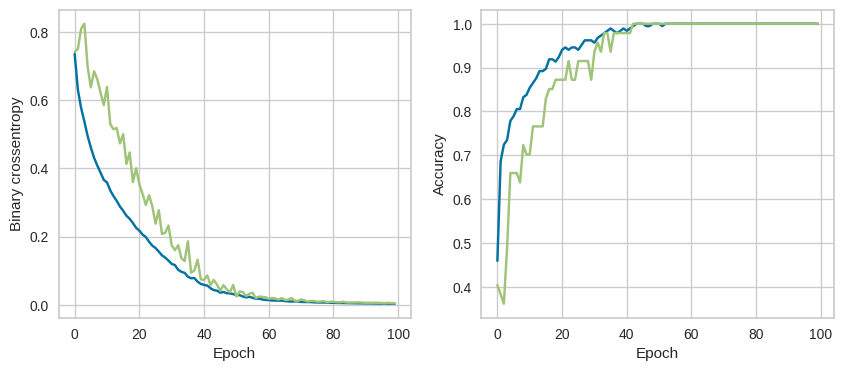

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7419 - loss: 2.5281
16 nodes, dropout 0, lr 0.01, batch size 64


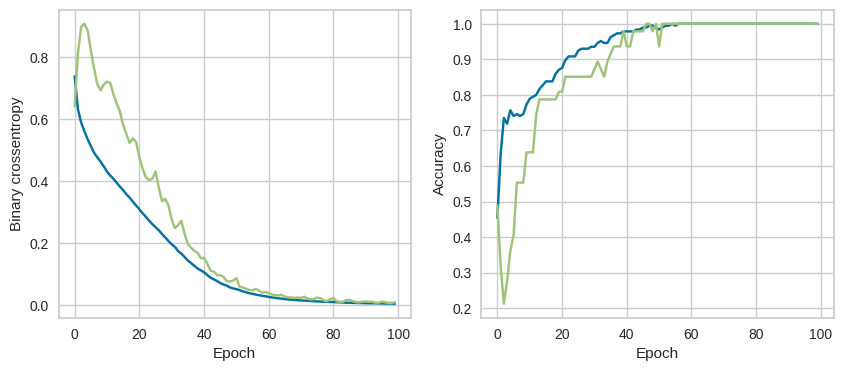

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6651 - loss: 2.3410
16 nodes, dropout 0, lr 0.01, batch size 128


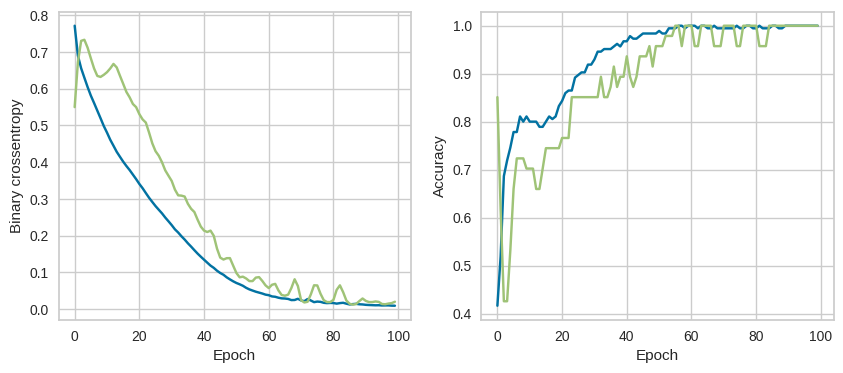

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6983 - loss: 1.6517
16 nodes, dropout 0, lr 0.005, batch size 32


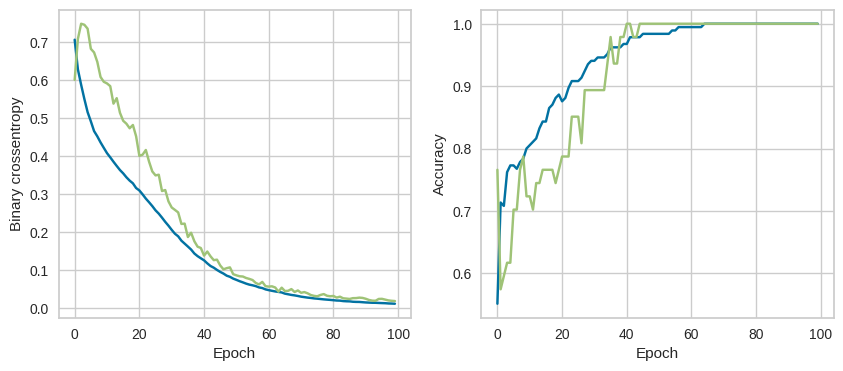

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6755 - loss: 1.6046
16 nodes, dropout 0, lr 0.005, batch size 64


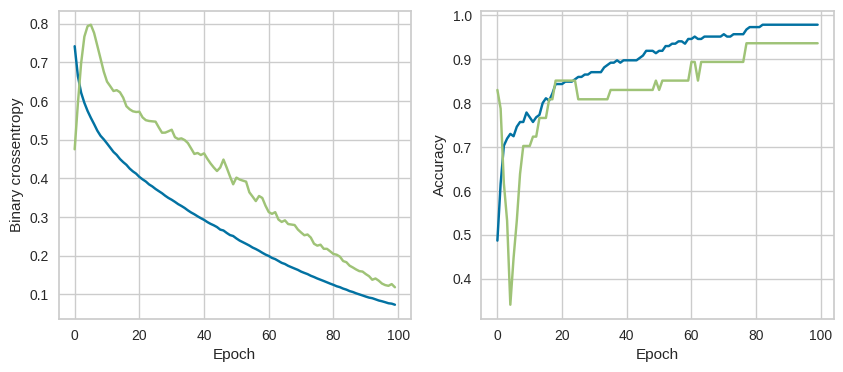

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7334 - loss: 1.2580
16 nodes, dropout 0, lr 0.005, batch size 128


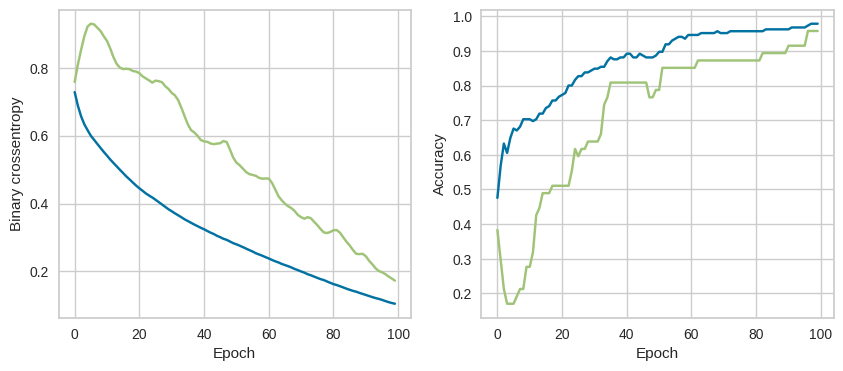

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7458 - loss: 0.9374
16 nodes, dropout 0, lr 0.0001, batch size 32


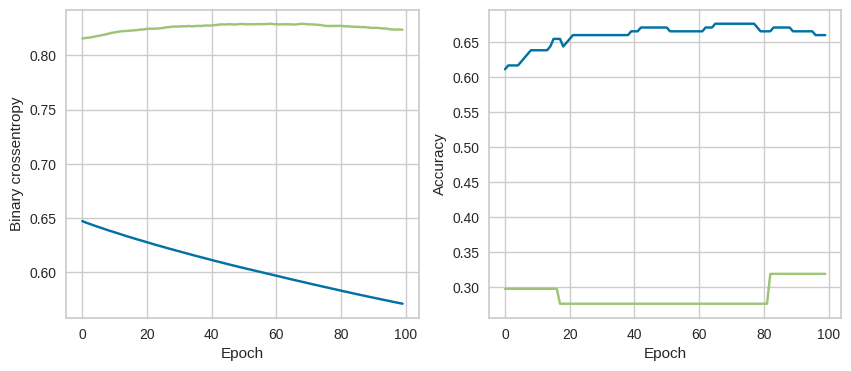

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8264 - loss: 0.4781
16 nodes, dropout 0, lr 0.0001, batch size 64


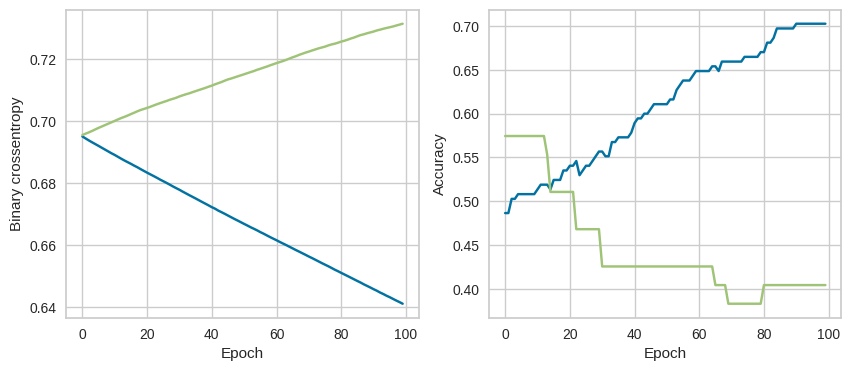

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7438 - loss: 0.6315
16 nodes, dropout 0, lr 0.0001, batch size 128


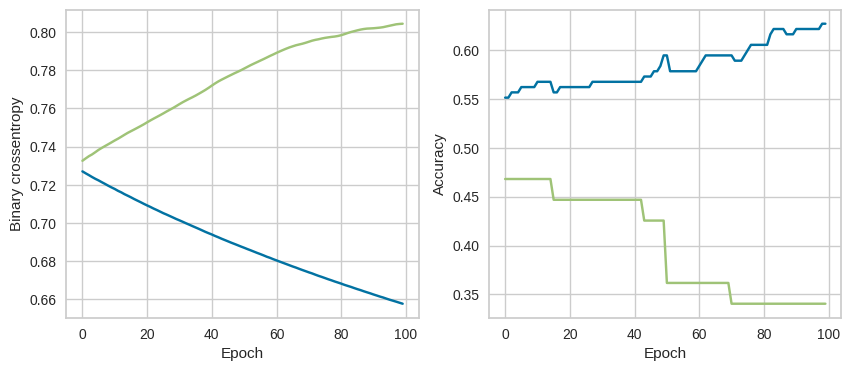

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5930 - loss: 0.6425
16 nodes, dropout 0.2, lr 0.01, batch size 32


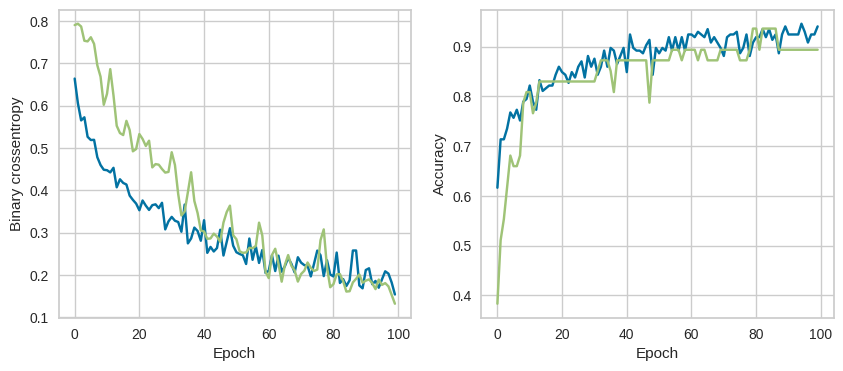

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7685 - loss: 0.7959
16 nodes, dropout 0.2, lr 0.01, batch size 64


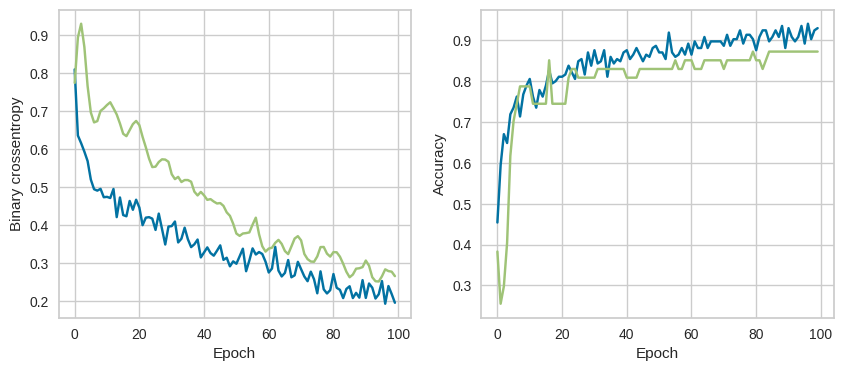

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7106 - loss: 0.6214
16 nodes, dropout 0.2, lr 0.01, batch size 128


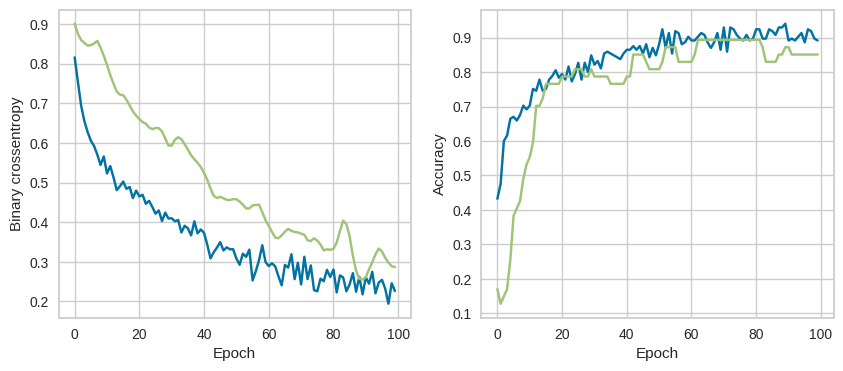

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7458 - loss: 0.7447
16 nodes, dropout 0.2, lr 0.005, batch size 32


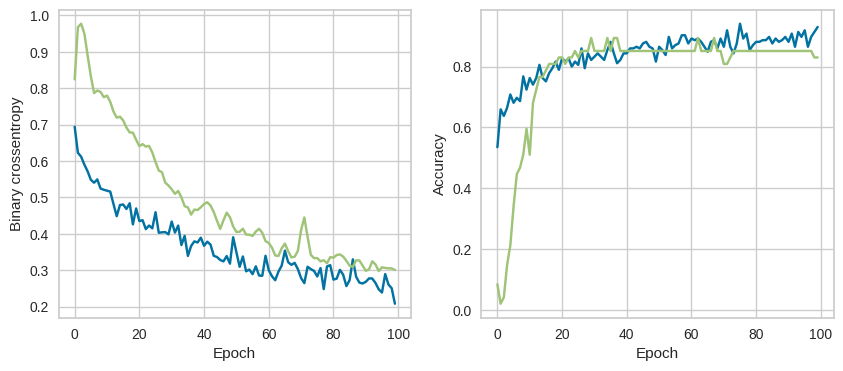

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7458 - loss: 0.7309
16 nodes, dropout 0.2, lr 0.005, batch size 64


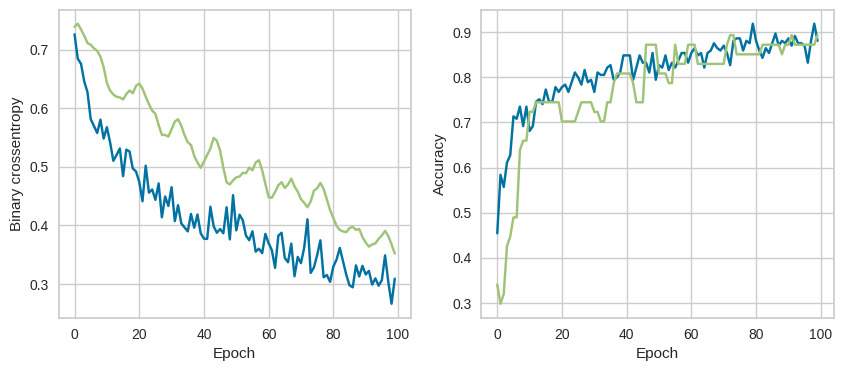

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7477 - loss: 0.5474
16 nodes, dropout 0.2, lr 0.005, batch size 128


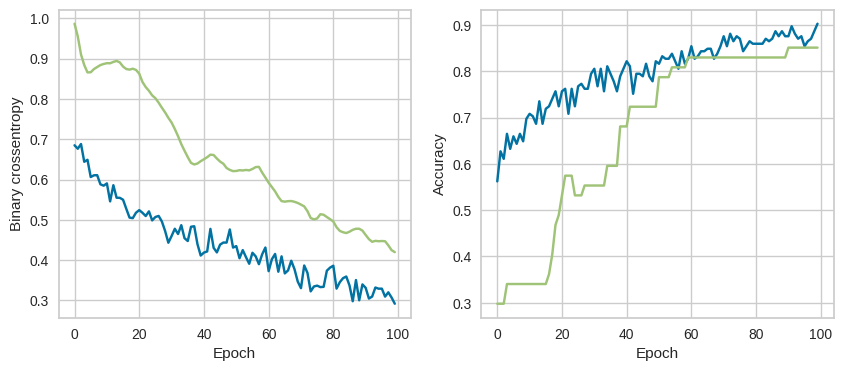

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7562 - loss: 0.5533
16 nodes, dropout 0.2, lr 0.0001, batch size 32


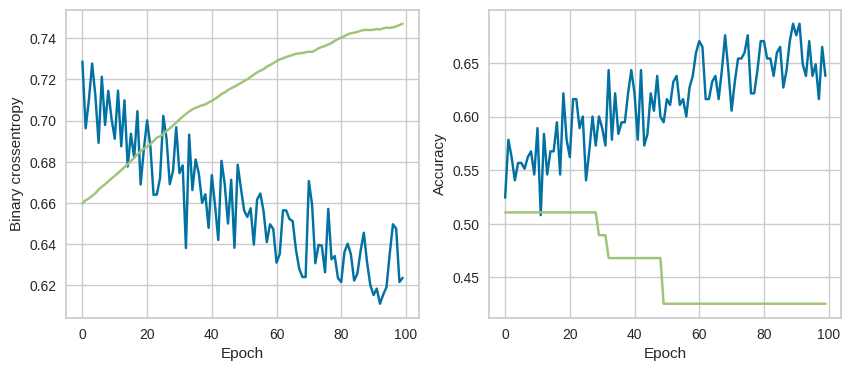

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6983 - loss: 0.6458
16 nodes, dropout 0.2, lr 0.0001, batch size 64


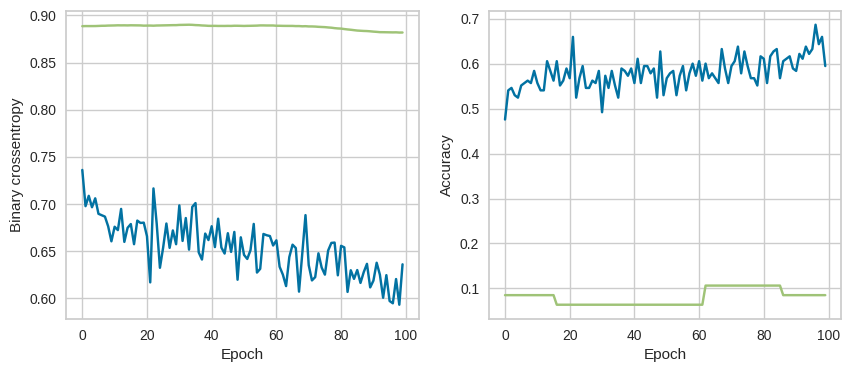

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7315 - loss: 0.5372
16 nodes, dropout 0.2, lr 0.0001, batch size 128


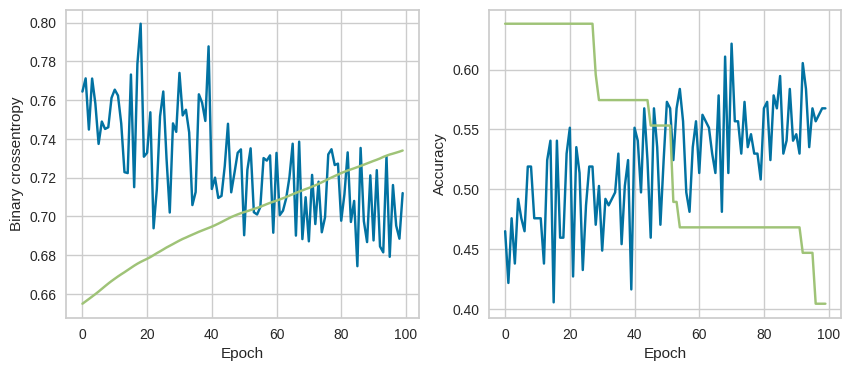

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5721 - loss: 0.6403
32 nodes, dropout 0, lr 0.01, batch size 32


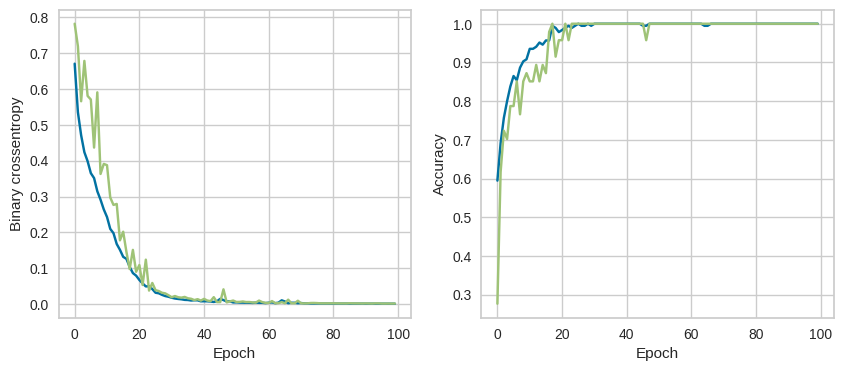

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7087 - loss: 2.4283
32 nodes, dropout 0, lr 0.01, batch size 64


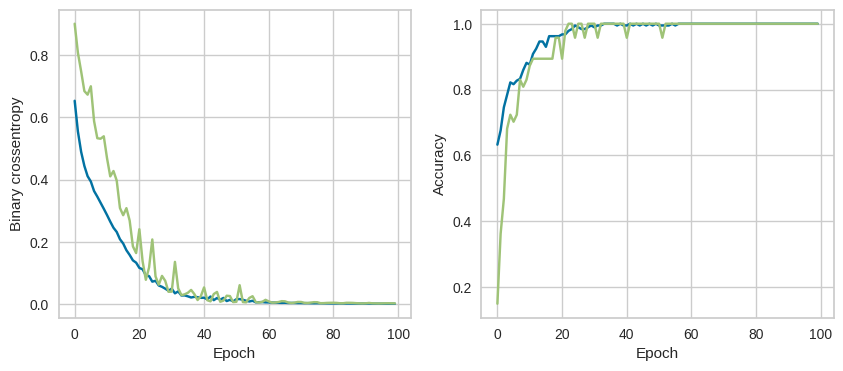

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6424 - loss: 2.7790
32 nodes, dropout 0, lr 0.01, batch size 128


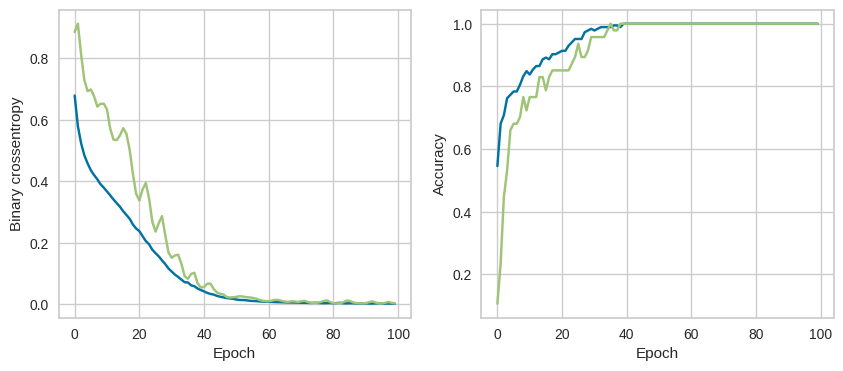

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7438 - loss: 2.2039
32 nodes, dropout 0, lr 0.005, batch size 32


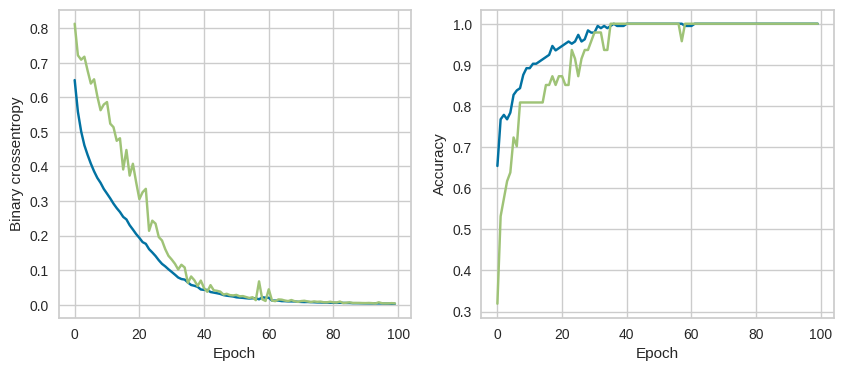

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6983 - loss: 2.5351
32 nodes, dropout 0, lr 0.005, batch size 64


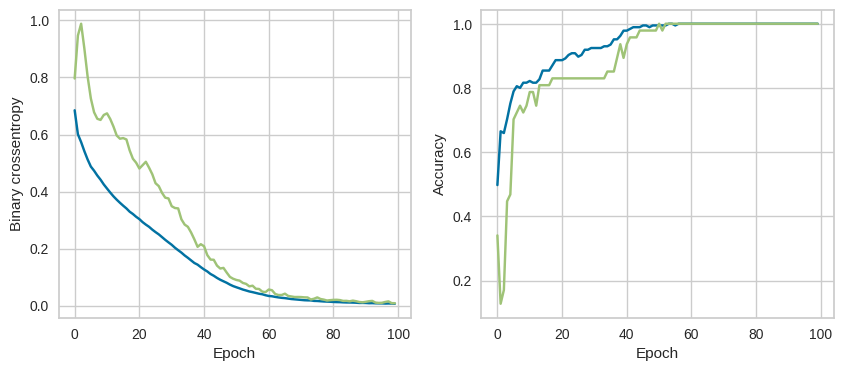

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6860 - loss: 2.0562
32 nodes, dropout 0, lr 0.005, batch size 128


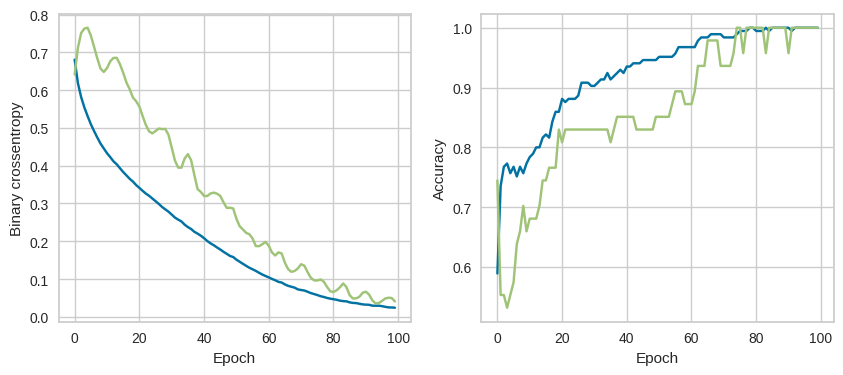

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6860 - loss: 1.4095
32 nodes, dropout 0, lr 0.0001, batch size 32


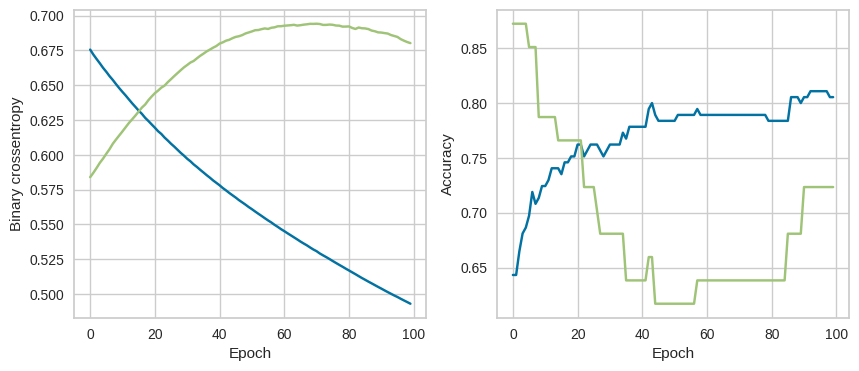

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7126 - loss: 0.5263
32 nodes, dropout 0, lr 0.0001, batch size 64


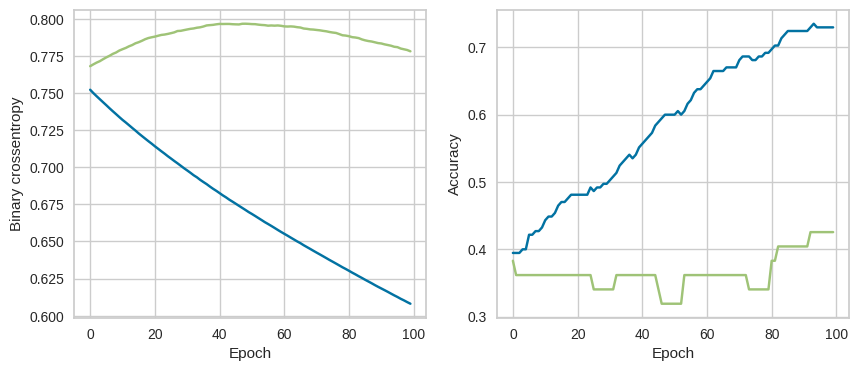

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7894 - loss: 0.5583
32 nodes, dropout 0, lr 0.0001, batch size 128


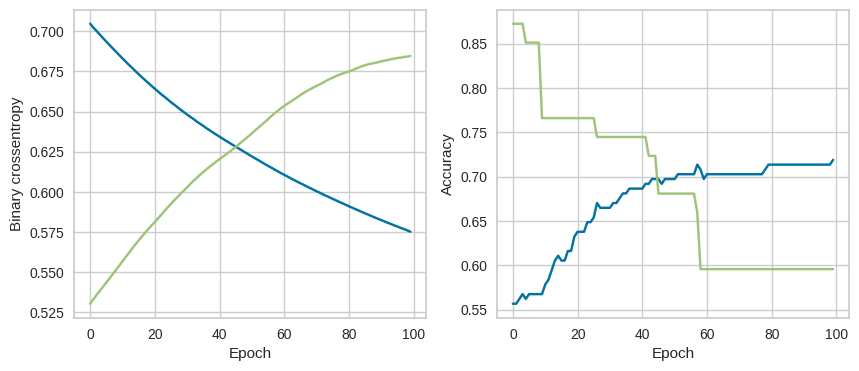

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6794 - loss: 0.5685
32 nodes, dropout 0.2, lr 0.01, batch size 32


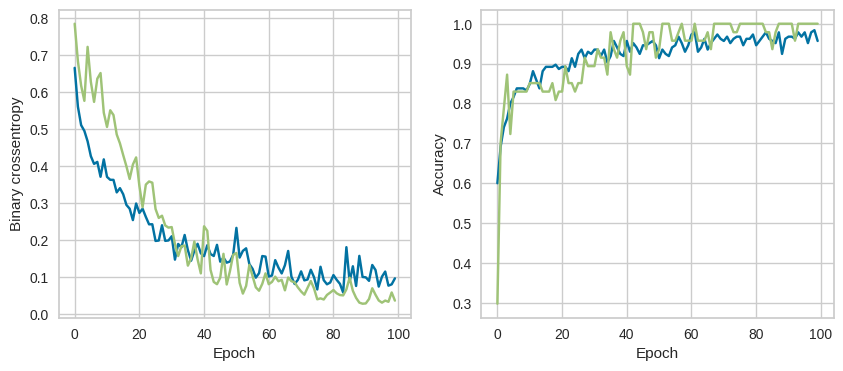

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7334 - loss: 1.3949
32 nodes, dropout 0.2, lr 0.01, batch size 64


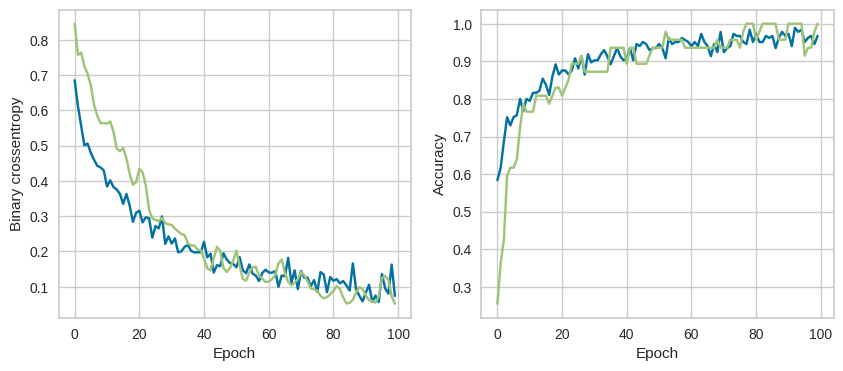

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7438 - loss: 1.4211
32 nodes, dropout 0.2, lr 0.01, batch size 128


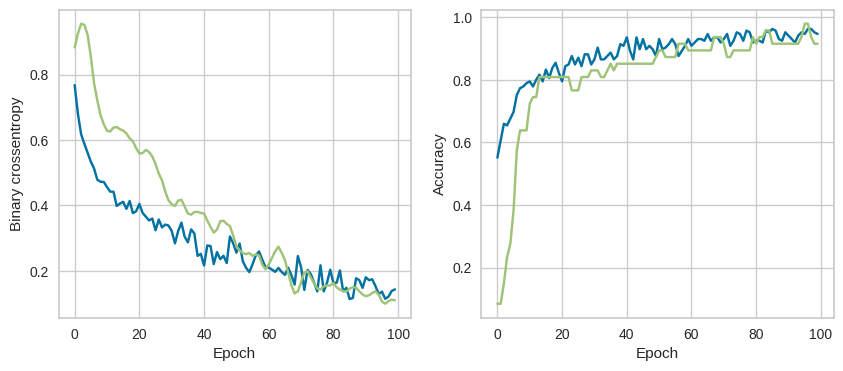

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7581 - loss: 0.9871
32 nodes, dropout 0.2, lr 0.005, batch size 32


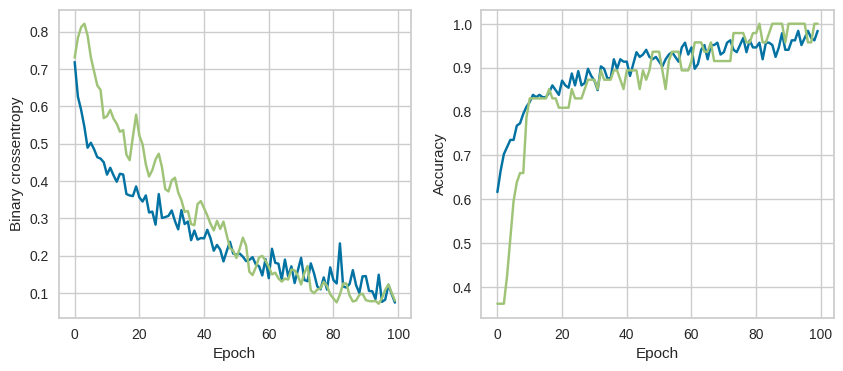

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7685 - loss: 1.2005
32 nodes, dropout 0.2, lr 0.005, batch size 64


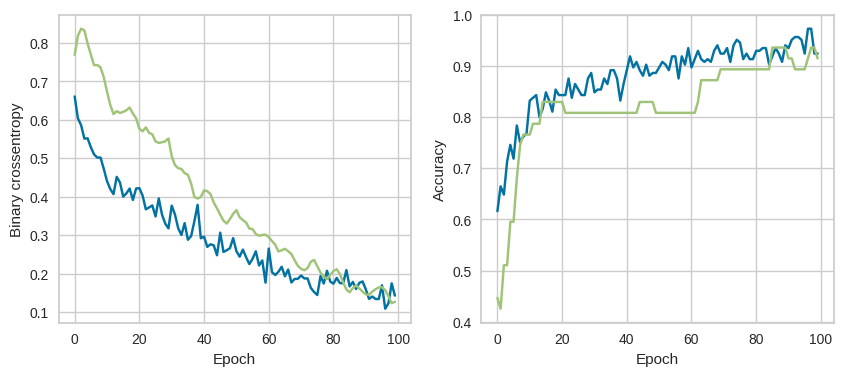

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7211 - loss: 0.8957
32 nodes, dropout 0.2, lr 0.005, batch size 128


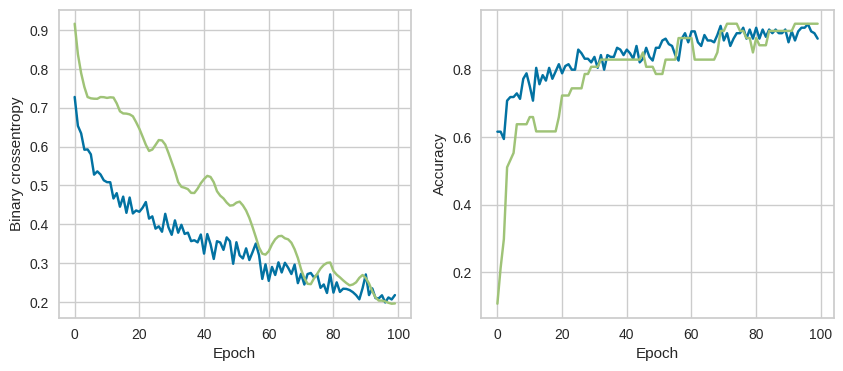

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7230 - loss: 0.7079
32 nodes, dropout 0.2, lr 0.0001, batch size 32


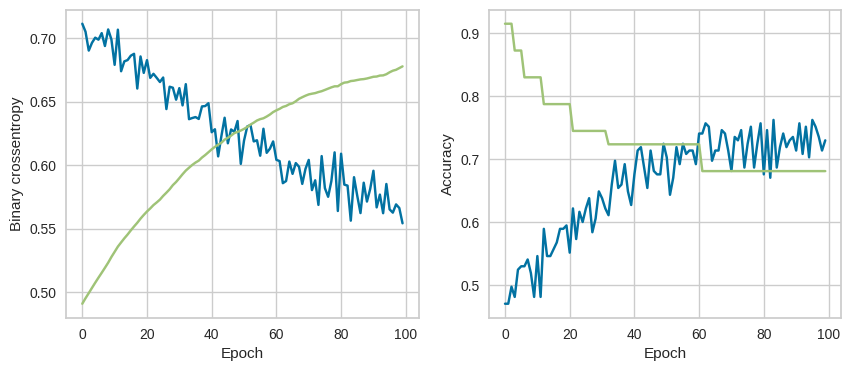

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7145 - loss: 0.5513
32 nodes, dropout 0.2, lr 0.0001, batch size 64


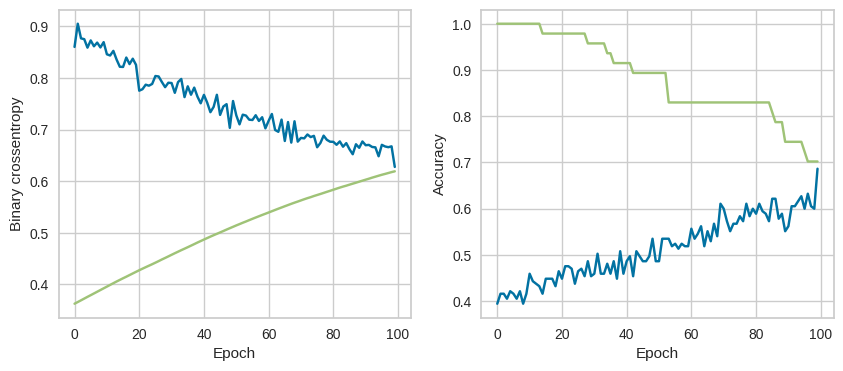

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5826 - loss: 0.6814
32 nodes, dropout 0.2, lr 0.0001, batch size 128


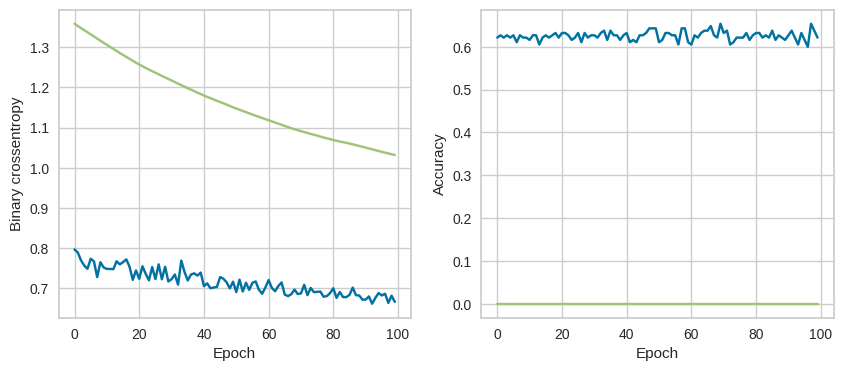

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8349 - loss: 0.5342
64 nodes, dropout 0, lr 0.01, batch size 32


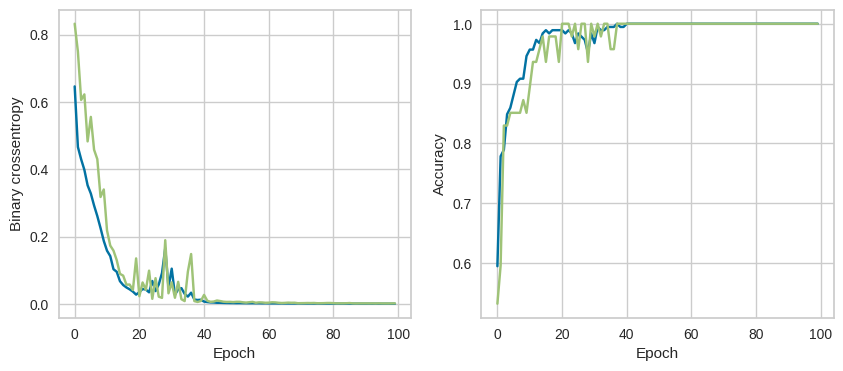

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6736 - loss: 3.1941
64 nodes, dropout 0, lr 0.01, batch size 64


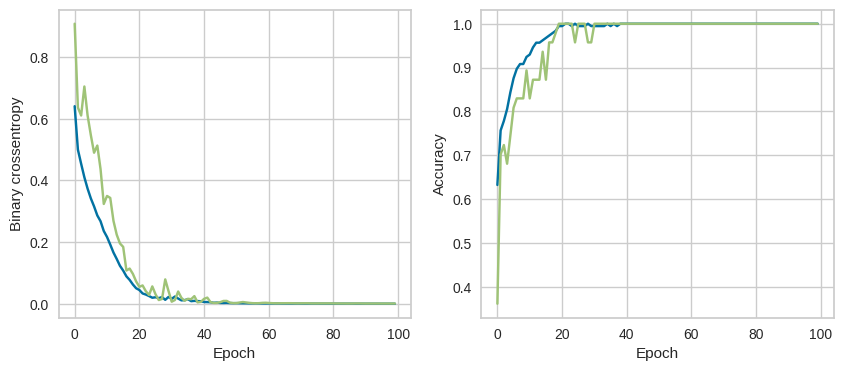

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6860 - loss: 2.8719
64 nodes, dropout 0, lr 0.01, batch size 128


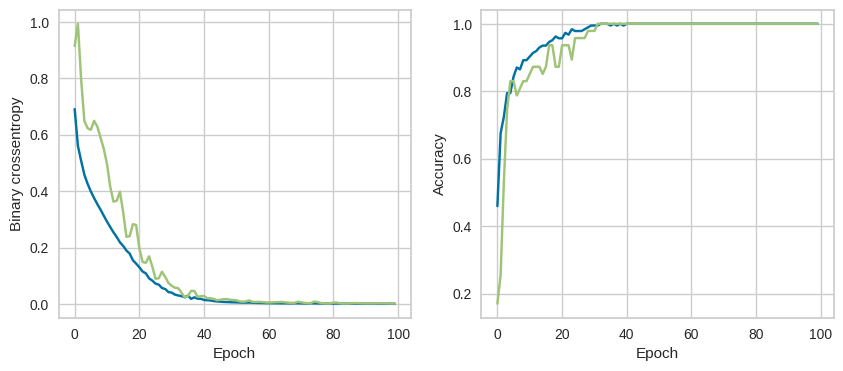

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7087 - loss: 3.0277
64 nodes, dropout 0, lr 0.005, batch size 32


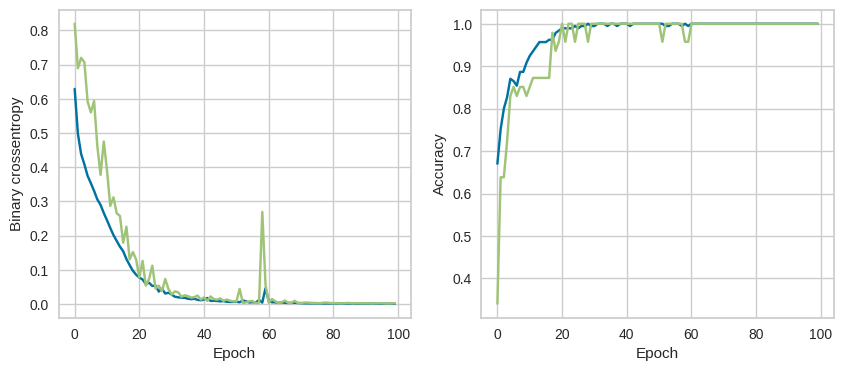

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6281 - loss: 2.5181
64 nodes, dropout 0, lr 0.005, batch size 64


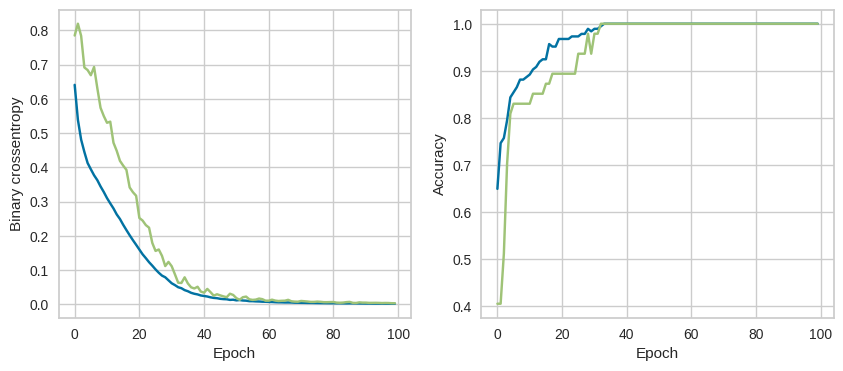

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6736 - loss: 2.0551
64 nodes, dropout 0, lr 0.005, batch size 128


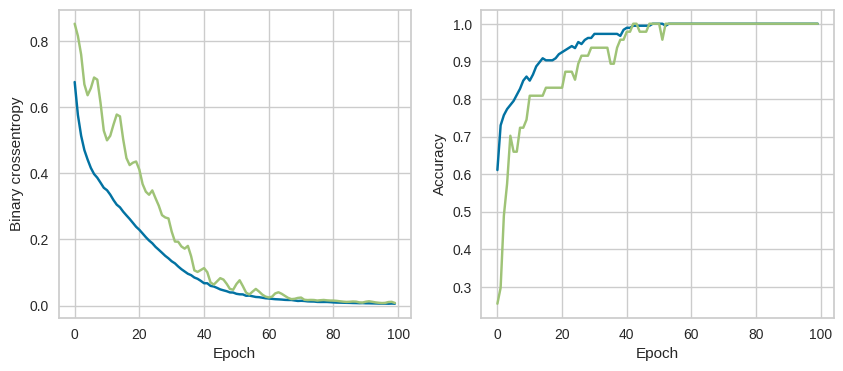

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6860 - loss: 2.2854
64 nodes, dropout 0, lr 0.0001, batch size 32


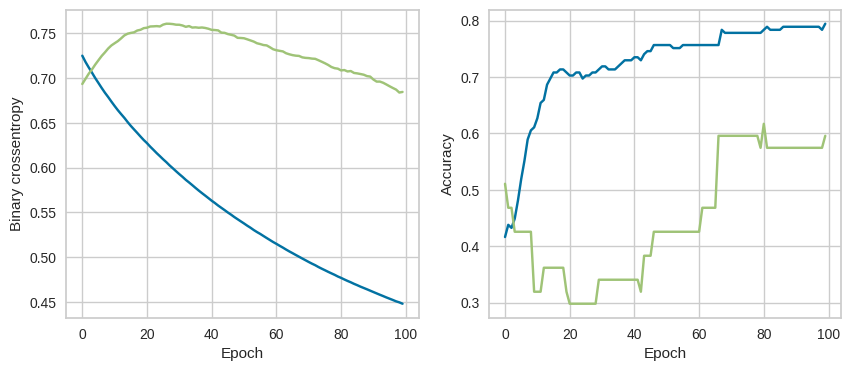

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7581 - loss: 0.5012
64 nodes, dropout 0, lr 0.0001, batch size 64


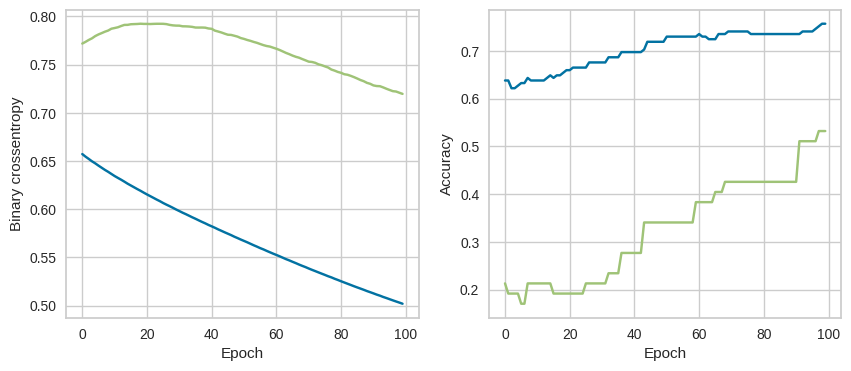

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8036 - loss: 0.4761
64 nodes, dropout 0, lr 0.0001, batch size 128


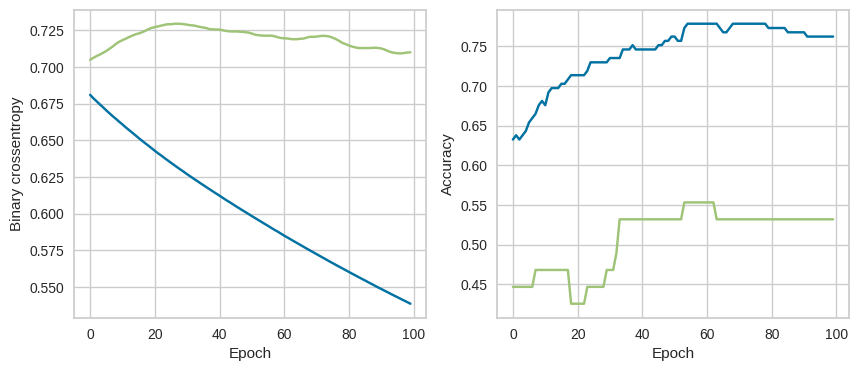

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7353 - loss: 0.5478
64 nodes, dropout 0.2, lr 0.01, batch size 32


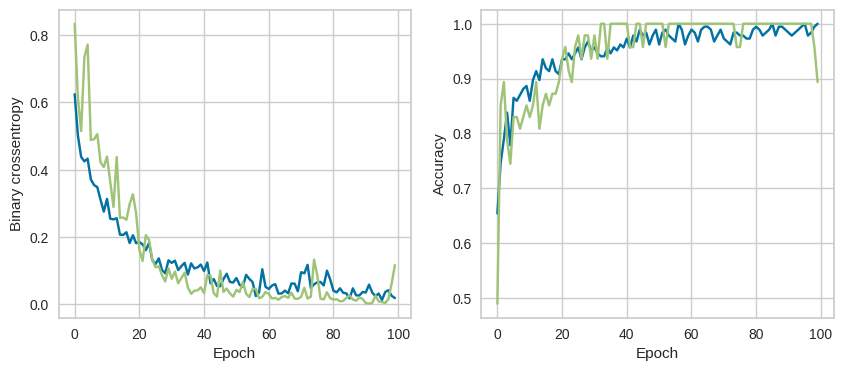

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7334 - loss: 2.0321
64 nodes, dropout 0.2, lr 0.01, batch size 64


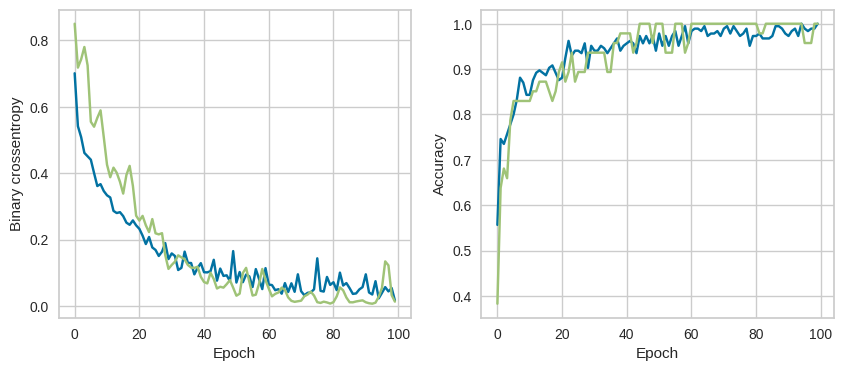

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7230 - loss: 2.1316
64 nodes, dropout 0.2, lr 0.01, batch size 128


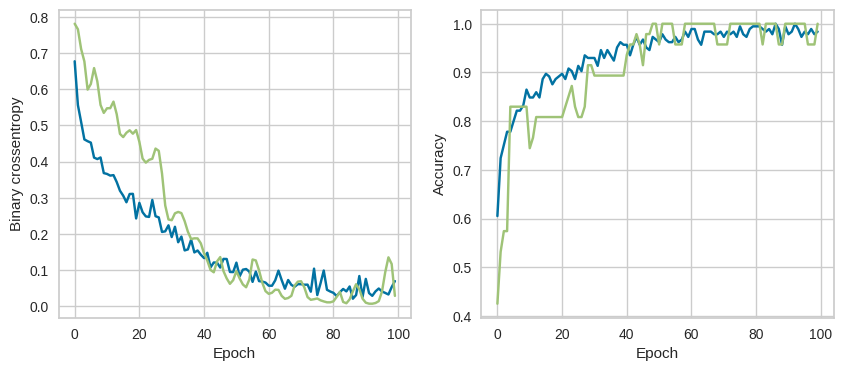

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7106 - loss: 2.0194
64 nodes, dropout 0.2, lr 0.005, batch size 32


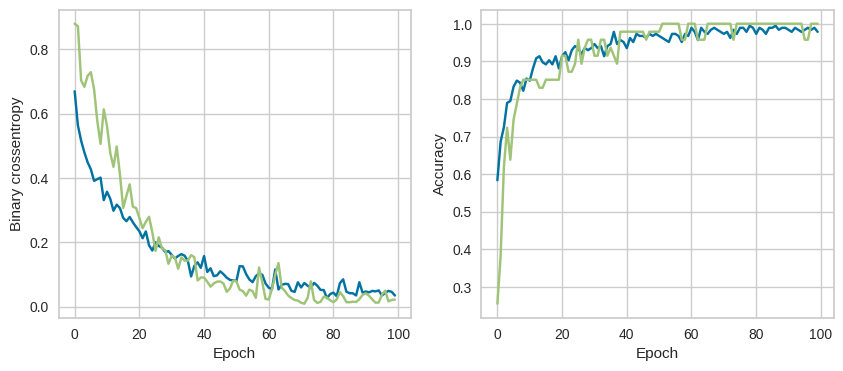

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7458 - loss: 1.6039
64 nodes, dropout 0.2, lr 0.005, batch size 64


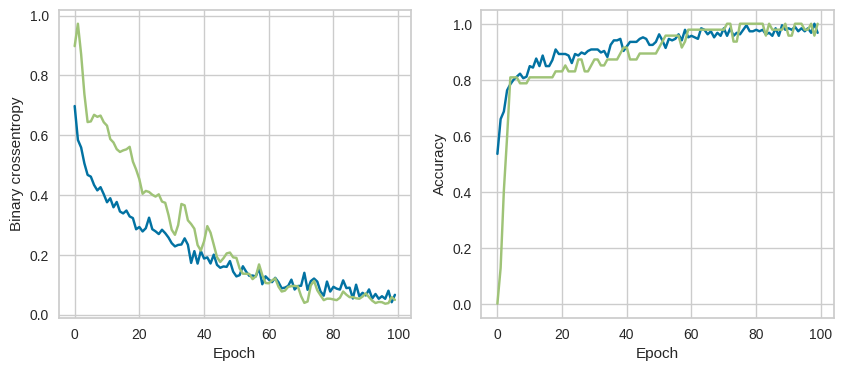

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7334 - loss: 1.2863
64 nodes, dropout 0.2, lr 0.005, batch size 128


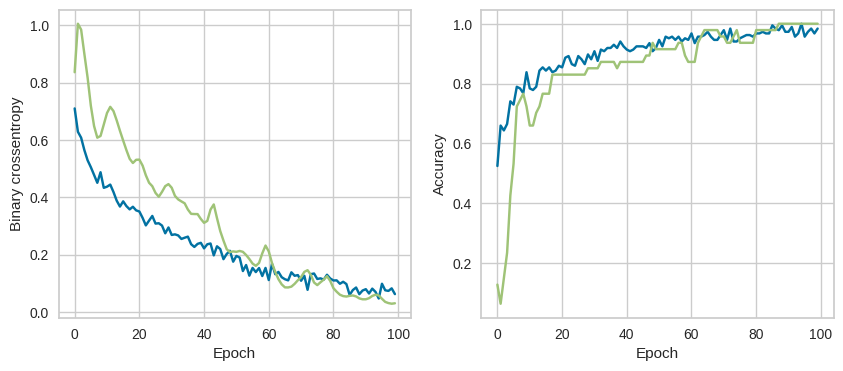

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6860 - loss: 1.3915
64 nodes, dropout 0.2, lr 0.0001, batch size 32


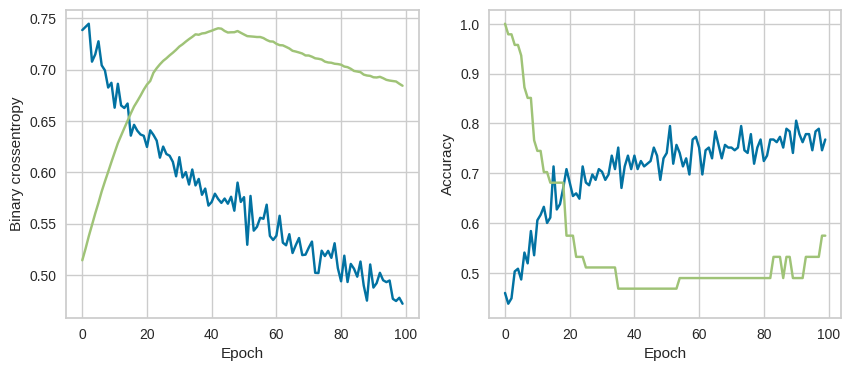

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7704 - loss: 0.4647
64 nodes, dropout 0.2, lr 0.0001, batch size 64


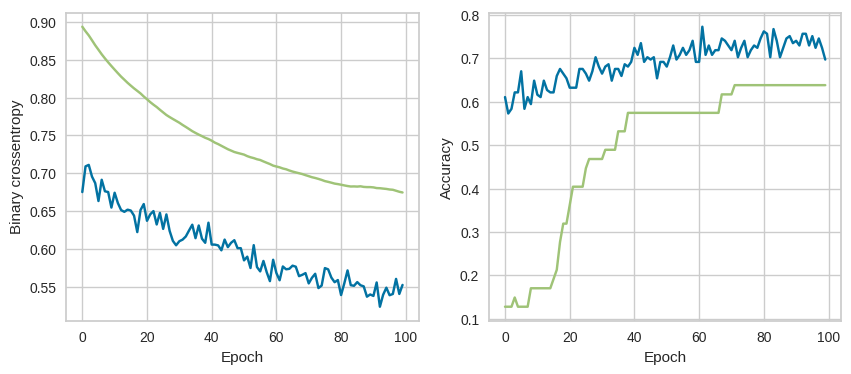

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7126 - loss: 0.5433
64 nodes, dropout 0.2, lr 0.0001, batch size 128


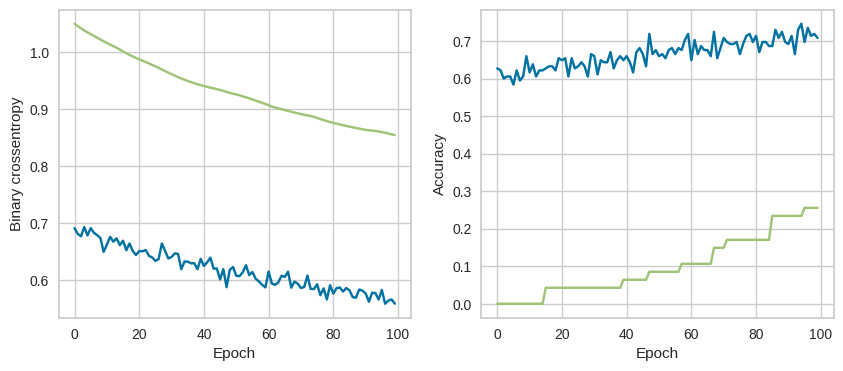

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8368 - loss: 0.4816


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.0001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
# predicting y
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
# predicting result for artificial neural network
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        35
           1       0.58      0.35      0.44        20

    accuracy                           0.67        55
   macro avg       0.64      0.60      0.60        55
weighted avg       0.66      0.67      0.65        55



In [ ]:
# Apply pca
pca = PCA(n_components= 12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Apply decision tree algorithms
clf = DecisionTreeClassifier()
# Fit the classifier to the training data
clf.fit(X_train_pca, y_train)
# Make predictions on the test data
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        35
           1       0.56      0.45      0.50        20

    accuracy                           0.67        55
   macro avg       0.64      0.62      0.63        55
weighted avg       0.66      0.67      0.66        55



In [ ]:
# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier()
# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.80      0.73        35
           1       0.46      0.30      0.36        20

    accuracy                           0.62        55
   macro avg       0.56      0.55      0.55        55
weighted avg       0.59      0.62      0.60        55



In [ ]:
# Applying SVM
svm = SVC(kernel = 'linear', C = 1.0, random_state = 100)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62        35
           1       0.42      0.55      0.48        20

    accuracy                           0.56        55
   macro avg       0.56      0.56      0.55        55
weighted avg       0.59      0.56      0.57        55



In [ ]:
# model timerecurrence
df_timerecurrence = df_breast_correl[['age','hormonal','amputation','histtype','diam','posnodes','grade','angioinv','lymphinfil','esr1','G3PDH_570','eventdeath','timerecurrence']]
# splitting the data
train, valid, test = np.split(df_timerecurrence.sample(frac=1), [int(0.6*len(df_timerecurrence)), int(0.8*len(df_timerecurrence))])
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y
# apply the scale_dataset function
train, X_train, y_train = scale_dataset(train, oversample=False)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# pca
pca = PCA(n_components= 12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:

# building the MLP model for time recurrence
mlp = Sequential(name="MLP")
mlp.add(Dense(64, activation='relu'))
mlp.add(Dense(64, input_shape=(17,), activation='relu'))
mlp.add(Dense(1, activation='linear'))
mlp.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mae'])
history = mlp.fit(
    X_train_pca, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0906 - mae: 0.2371 - val_loss: 0.0310 - val_mae: 0.1278
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0239 - mae: 0.1178 - val_loss: 0.0115 - val_mae: 0.0832
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mae: 0.0821 - val_loss: 0.0088 - val_mae: 0.0729
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mae: 0.0705 - val_loss: 0.0080 - val_mae: 0.0682
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 - mae: 0.0654 - val_loss: 0.0065 - val_mae: 0.0624
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mae: 0.0591 - val_loss: 0.0059 - val_mae: 0.0584
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mae: 0.0557 - val_loss: 0.0057 - val_mae: 0.0570
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - mae: 0.0517 - val_loss: 0.0053 - val_mae: 0.0559
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mae: 0.

In [ ]:
loss, mae = mlp.evaluate(X_test_pca, y_test)
predictions = mlp.predict(X_test_pca)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mae: 0.0434 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
R^2 Score: 0.6842506502458383


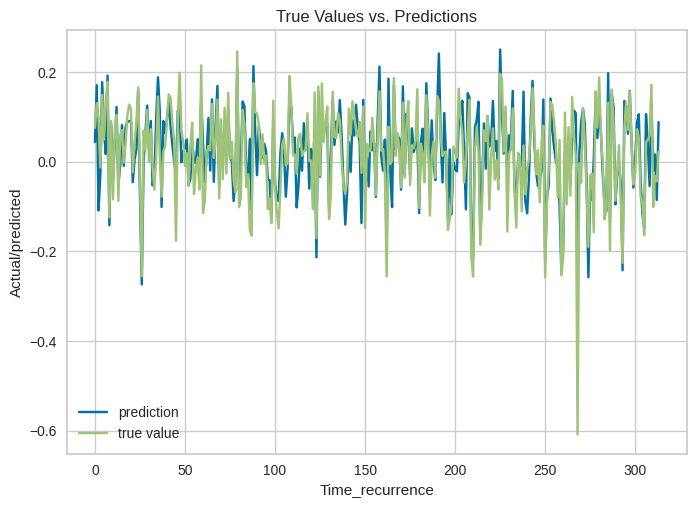

In [ ]:
#plotting the graph for visualisation
plt.plot(predictions, label= 'prediction')
plt.plot(y_test, label = 'true value')
plt.title('True Values vs. Predictions')
plt.legend()
plt.xlabel('Time_recurrence')
plt.ylabel('Actual/predicted')
plt.savefig('MLP_recurrence')
plt.show()

In [ ]:
# using liear regression
df_linear = LinearRegression()
df_linear.fit(X_train_pca, y_train)
Linear_predictions =df_linear.predict(X_test_pca)
r2 = r2_score(y_test, Linear_predictions)
print(r2)

0.84063724280995


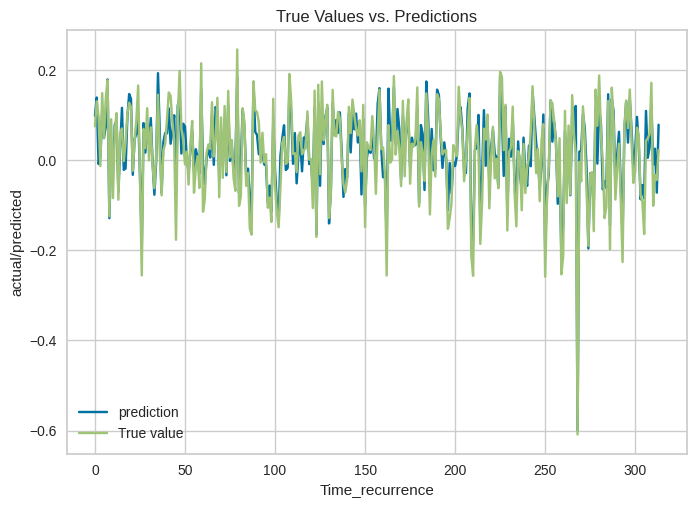

In [ ]:
# plot graph for linear regression
plt.plot(Linear_predictions, label= 'prediction')
plt.plot(y_test, label = 'True value')
plt.title('True Values vs. Predictions')
plt.xlabel('Time_recurrence')
plt.ylabel('actual/predicted')
plt.legend()
plt.savefig('Regression')
plt.show()

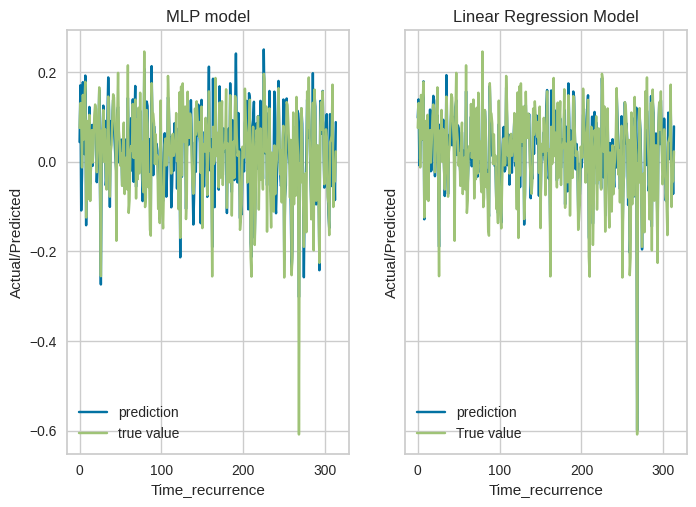

In [ ]:
# subplots of both algorithms
fig, ax = plt.subplots(1,2, sharey= True)
ax[0].plot(predictions, label= 'prediction')
ax[0].plot(y_test, label = 'true value')
ax[1].plot(Linear_predictions, label= 'prediction')
ax[1].plot(y_test, label = 'True value')
ax[0].set_xlabel('Time_recurrence')
ax[0].set_ylabel('Actual/Predicted')
ax[1].set_ylabel('Actual/Predicted')
ax[1].set_xlabel('Time_recurrence')
ax[0].set_title('MLP model')
ax[1].set_title('Linear Regression Model')
ax[0].legend()
ax[1].legend()
plt.legend
plt.savefig('subplot')
plt.show()

In [ ]:
# Modeling 10 and 5-year Surviver of patient
df_survival = df_breast_cancer[['age', 'chemo','hormonal','amputation','histtype','diam','posnodes','grade','angioinv','lymphinfil','esr1','G3PDH_570','Contig45645_RC','Contig44916_RC','D25272','J00129','eventdeath','survival']]
df_survival['5_year_survivability'] = (df_survival['survival'] >=5).astype(int)
df_survival['10_year_survivabiity'] = (df_survival['survival'] >=10).astype(int)
print(df_survival)

     age  chemo  hormonal  amputation  histtype  diam  posnodes  grade  \
0     43      0         0           1         1    25         0      2   
1     48      0         0           0         1    20         0      3   
2     38      0         0           0         1    15         0      2   
3     50      0         1           0         1    15         1      2   
4     38      0         0           1         1    15         0      2   
..   ...    ...       ...         ...       ...   ...       ...    ...   
267   48      1         0           1         1    30         0      3   
268   39      0         0           1         1    30         0      2   
269   50      0         0           1         1    27         0      3   
270   52      0         1           1         1    28         0      3   
271   52      0         0           1         1    30         0      2   

     angioinv  lymphinfil      esr1  G3PDH_570  Contig45645_RC  \
0           3           1 -0.413955  -0.95424

/tmp/ipython-input-698749579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survival['5_year_survivability'] = (df_survival['survival'] >=5).astype(int)
/tmp/ipython-input-698749579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survival['10_year_survivabiity'] = (df_survival['survival'] >=10).astype(int)


In [ ]:
# extract features and target for the model
X = df_survival[['age', 'chemo','hormonal','amputation','histtype','diam','posnodes','grade','angioinv','lymphinfil','esr1','G3PDH_570','Contig45645_RC','Contig44916_RC','D25272','J00129']]
y_5_years = df_survival['5_year_survivability']
y_10_years = df_survival['10_year_survivabiity']

# Train,testn dataset for 5-years survivability
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y_5_years, test_size=0.2, random_state = 100)
# Train,testn dataset for 10-years survivability
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y_10_years, test_size=0.2, random_state = 100)

In [ ]:
# apply random forest
rf_5_years = RandomForestClassifier(n_estimators= 100, random_state = 100)
rf_10_years = RandomForestClassifier(n_estimators= 100, random_state = 100)
rf_5_years.fit(X_train_5,y_train_5)
rf_10_years.fit(X_train_10,y_train_10)

# make predictions
y_pred_5 = rf_5_years.predict(X_test_5)
y_pred_10 = rf_10_years.predict(X_test_10)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_5_years = accuracy_score(y_test_5, y_pred_5)
accuracy_10_years = accuracy_score(y_test_10, y_pred_10)
list_survival = {'5_years':accuracy_5_years,'10_years':accuracy_10_years}
print(list_survival)

{'5_years': 0.8363636363636363, '10_years': 0.7090909090909091}


In [ ]:
# applying decission tree algorithms
clf = DecisionTreeClassifier()
clf_5_years =  DecisionTreeClassifier()
clf_10_years = DecisionTreeClassifier()
clf_5_years.fit(X_train_5,y_train_5)
clf_10_years.fit(X_train_10,y_train_10)
# make predictions
y_pred_5 = clf_5_years.predict(X_test_5)
y_pred_10 = clf_10_years.predict(X_test_10)
accuracy_5_years = accuracy_score(y_test_5, y_pred_5)
accuracy_10_years = accuracy_score(y_test_10, y_pred_10)
list_survival = {'5_years':accuracy_5_years,'10_years':accuracy_10_years}
print(list_survival)

{'5_years': 0.8181818181818182, '10_years': 0.7272727272727273}


In [ ]:
# Applying SVM
svm = SVC(kernel = 'linear', C = 1.0, random_state = 100)
svm_5_years =  SVC(kernel = 'linear', C = 1.0, random_state = 100)
svm_10_years = SVC(kernel = 'linear', C = 1.0, random_state = 100)
svm_5_years.fit(X_train_5,y_train_5)
svm_10_years.fit(X_train_10,y_train_10)
# make predictions
y_pred_5 = svm_5_years.predict(X_test_5)


y_pred_10 = svm_10_years.predict(X_test_10)
accuracy_5_years = accuracy_score(y_test_5, y_pred_5)
accuracy_10_years = accuracy_score(y_test_10, y_pred_10)
list_survival = {'5_years':accuracy_5_years,'10_years':accuracy_10_years}
print(list_survival)

{'5_years': 0.8363636363636363, '10_years': 0.7818181818181819}


In [ ]:
# ANN model for survival
df_survival_5_years = df_survival[['age', 'chemo','hormonal','amputation','histtype','diam','posnodes','grade','angioinv','lymphinfil','esr1','G3PDH_570','Contig45645_RC','Contig44916_RC','D25272','J00129','5_year_survivability']]
train, valid, test = np.split(df_survival_5_years.sample(frac=1), [int(0.6*len(df_survival_5_years)), int(0.8*len(df_survival_5_years))])

# preprocess the dataframe of survival
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Creating  multilayer perceptron from scratch
mlp = Sequential(name="MLP")
mlp.add(Dense(4, input_shape=(16,), activation='relu'))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dense(1, activation='sigmoid'))
mlp.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])
history = mlp.fit(
    X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.3641 - loss: 0.7223 - val_accuracy: 0.5741 - val_loss: 0.6671
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5073 - loss: 0.7023 - val_accuracy: 0.2407 - val_loss: 0.7067
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5620 - loss: 0.6930 - val_accuracy: 0.1667 - val_loss: 0.7435
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6166 - loss: 0.6830 - val_accuracy: 0.0926 - val_loss: 0.7774
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6312 - loss: 0.6809 - val_accuracy: 0.0000e+00 - val_loss: 0.8085
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6084 - loss: 0.6765 - val_accuracy: 0.0000e+00 - val_loss: 0.8375
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6556 - loss: 0.6655 - val_accuracy: 0.0000e+00 - val_loss: 0.8649
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6390 - loss: 0.6608 - val_accuracy: 0.0000e+00 - val_loss: 0.

In [ ]:
# predicting with MLP model and evaluating accuracy
y_pred = mlp.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
accuracy_5_years = accuracy_score(y_test, y_pred)
print(accuracy_5_years)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
0.7454545454545455


In [ ]:
df_survival_10_years = df_survival[['age', 'chemo','hormonal','amputation','histtype','diam','posnodes','grade','angioinv','lymphinfil','esr1','G3PDH_570','Contig45645_RC','Contig44916_RC','D25272','J00129','10_year_survivabiity']]
train, valid, test = np.split(df_survival_10_years.sample(frac=1), [int(0.6*len(df_survival_10_years)), int(0.8*len(df_survival_10_years))])
# preprocess 10-year
# preprocess the dataframe of survival
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)
mlp = Sequential(name="MLP")
mlp.add(Dense(64, input_shape=(16,), activation='relu'))
model.add(Dropout(0.5))
mlp.add(Dense(4, activation='relu'))
mlp.add(Dense(1, activation='sigmoid'))
mlp.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = mlp.fit(
    X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.6026 - loss: 0.6760 - val_accuracy: 0.1739 - val_loss: 0.7888
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6492 - loss: 0.6582 - val_accuracy: 0.0870 - val_loss: 0.8081
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6429 - loss: 0.6539 - val_accuracy: 0.0000e+00 - val_loss: 0.8291
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5936 - loss: 0.6479 - val_accuracy: 0.0000e+00 - val_loss: 0.8464
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6500 - loss: 0.6407 - val_accuracy: 0.0000e+00 - val_loss: 0.8659
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6773 - loss: 0.6293 - val_accuracy: 0.0000e+00 - val_loss: 0.8832
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6793 - loss: 0.6125 - val_accuracy: 0.0000e+00 - val_loss: 0.8966
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6656 - loss: 0.6108 - val_accuracy: 0.0000e+0

In [ ]:
y_pred_10 = mlp.predict(X_test)
y_pred_10 = (y_pred > 0.5).astype(int).reshape(-1,)
accuracy_10_years = accuracy_score(y_test, y_pred_10)
print(accuracy_10_years)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
0.2909090909090909


In [ ]:
# average age of survival
distribution = df_breast_cancer[['age', 'survival']]
distribution = distribution.copy()
distribution['survival'].sum(0)
distribution['probability'] = distribution['survival']/ distribution['survival'].sum(0)
#distribution['probability'].sum(0)
distribution



age   survival  probability
0     43  14.817248     0.006741
1     48  14.261465     0.006489
2     38   6.644764     0.003023
3     50   7.748118     0.003525
4     38   6.436687     0.002929
..   ...        ...          ...
267   48   2.608300     0.001187
268   39   5.504100     0.002504
269   50   2.619200     0.001192
270   52   2.290500     0.001042
271   52   3.737000     0.001700

[272 rows x 3 columns]

In [ ]:
# grouping the age
bins = [20,30,40,50,60]
group_names = ['21-30','31-40','41-50','51-60']
distribution['group_names']= pd.cut(distribution['age'], bins = bins, labels = group_names, right= False)
distribution['percentage_prob']= distribution['probability']*100
distribution

age   survival  probability group_names  percentage_prob
0     43  14.817248     0.006741       41-50         0.674147
1     48  14.261465     0.006489       41-50         0.648860
2     38   6.644764     0.003023       31-40         0.302320
3     50   7.748118     0.003525       51-60         0.352520
4     38   6.436687     0.002929       31-40         0.292853
..   ...        ...          ...         ...              ...
267   48   2.608300     0.001187       41-50         0.118671
268   39   5.504100     0.002504       31-40         0.250422
269   50   2.619200     0.001192       51-60         0.119167
270   52   2.290500     0.001042       51-60         0.104212
271   52   3.737000     0.001700       51-60         0.170024

[272 rows x 5 columns]

In [ ]:
distribution.groupby('group_names')['percentage_prob'].mean()

/tmp/ipython-input-2695213120.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution.groupby('group_names')['percentage_prob'].mean()


group_names
21-30    0.193076
31-40    0.323577
41-50    0.379482
51-60    0.387120
Name: percentage_prob, dtype: float64

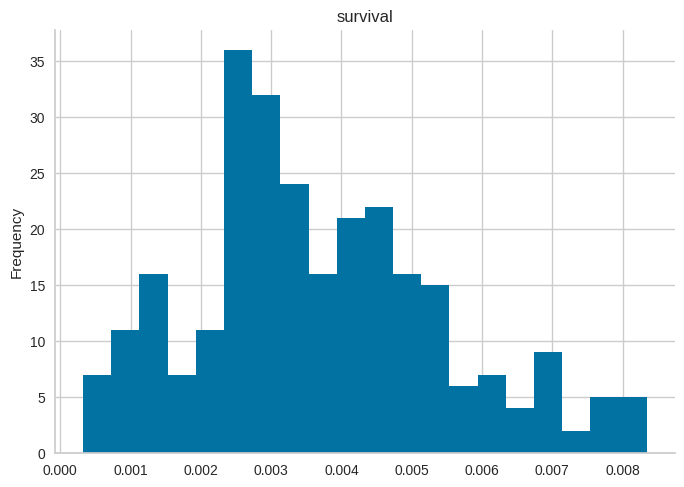

In [ ]:
# @title survival

from matplotlib import pyplot as plt
distribution['probability'].plot(kind='hist', bins=20, title='survival')
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-3976626228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="age", y="percentage_prob", data=distribution, kind="bar", aspect=1.5, height=6, palette="muted", errorbar=None, alpha=.8, dodge=False, width=0.6)


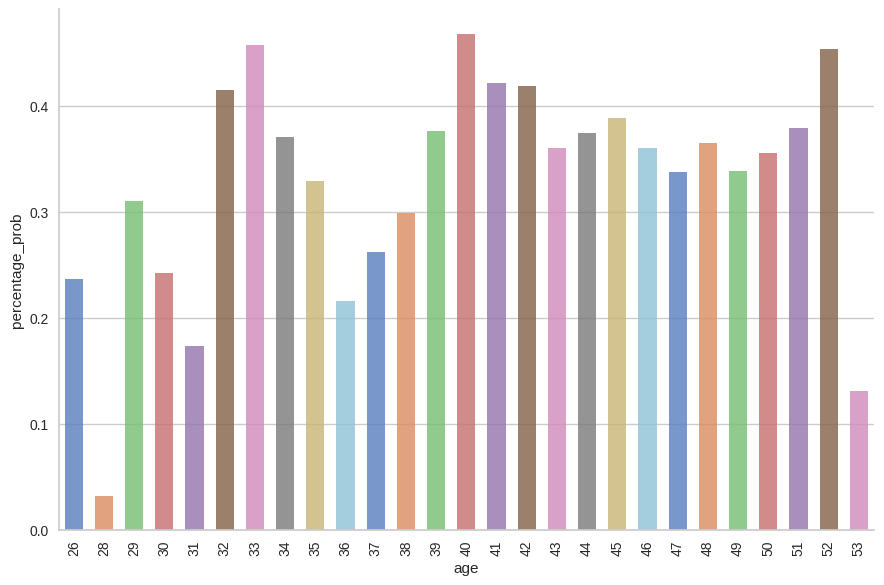

In [ ]:
# Create bar plot using catplot
sns.catplot(x="age", y="percentage_prob", data=distribution, kind="bar", aspect=1.5, height=6, palette="muted", errorbar=None, alpha=.8, dodge=False, width=0.6)
plt.xticks(rotation = 90)
plt.savefig('age_group.png')
plt.show()



AttributeError: 'numpy.ndarray' object has no attribute 'twinx'

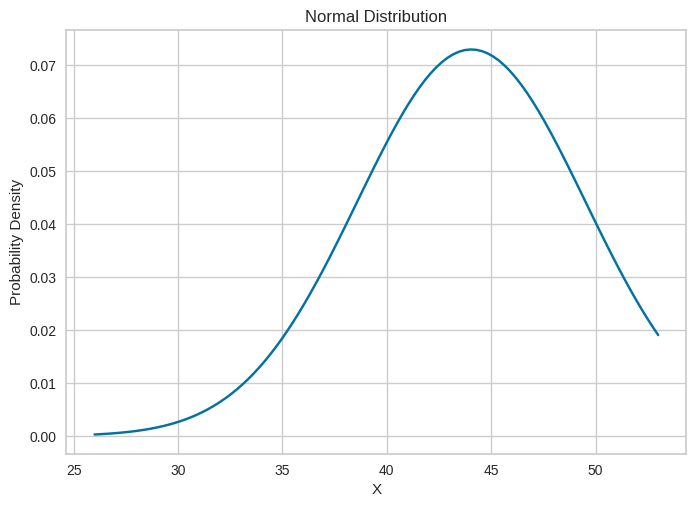

In [ ]:
# Define mean and standard deviation for the normal distribution
mean = distribution['age'].mean()
std_dev = distribution['age'].std()

# Create range of x-values for the normal distribution curve
x = np.linspace(26, 53, 100)  # Adjust the range as needed

# Compute y-values for the normal distribution curve
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, y, label='Normal Distribution')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')

# Plot normal distribution curve on top of the bar plot
ax2 = ax.twinx()
ax2.plot(x,y, color = 'red')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#probability of survival below the age of 40
norm.cdf(40,mean,std_dev)

In [ ]:
# probability of survival above age of 40
1-norm.cdf(40,mean,std_dev)

In [ ]:
# probabillity of survival between 40-45
norm.cdf(45,mean,std_dev)-norm.cdf(40,mean,std_dev)


In [ ]:
# probabillity of survival between 25-30
norm.cdf(30,mean,std_dev)-norm.cdf(25,mean,std_dev)